### DSCI 510 Fall2020 Final Project Submission

**1.Your name**

**2.Any major “gotchas” to the code?**

**3.Any libraries that need to be installed to run your code？**

**4.Anything else you feel is relevant to the grading of your project your project.**

**5.What did you set out to study?**

**6.What did you Discover/what were your conclusion**

**7. What difficulties did you have in completing the project?**

**8. What skills did you wish you had while you were doing the project?**

**9. What would you do “next” to expand or augment the project?**

In [1]:
# select the required attributes for linear regression analysis and generate the new file--> predict_price.csv (you can find /data)

In [2]:
import csv

temp = []
with open('data/price_restaurent.csv','r',encoding='utf-8')as ff:
    text = csv.reader(ff)
    for i in text:
        if 'sqft' not in i:
            if i[13].count('$') == 1:
                nums = 10
            elif i[13].count('$') == 2:
                nums = 30
            elif i[13].count('$') == 3:
                nums = 60
            elif i[13].count('$') == 4:
                nums = 100
            else:
                nums = 0
            temp.append([i[5],i[6],i[7],i[11],nums,i[4]])

with open('data/predict_price.csv','w',encoding='utf-8-sig',newline='')as fff:
    writer = csv.writer(fff)
    writer.writerow(['sqft','bds','ba','rating','avg_person','price'])
    for i in temp:
        writer.writerow(i)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
np.set_printoptions(suppress=True)
data = pd.read_csv('data/predict_price.csv')
#data['price']=data['price'].astype(str)

In [5]:
data.head(5) # check the attributes

,sqft,bds,ba,rating,avg_person,price
0,1151.0,2.0,3.0,4.5,30,612900
1,1151.0,2.0,3.0,4.5,30,612900
2,1151.0,2.0,3.0,4.0,30,612900
3,1151.0,2.0,3.0,4.5,30,612900
4,1151.0,2.0,3.0,4.0,30,612900


In [6]:
data.info() #Check the null value, because the data is processed in miletone2, so there is no need to fill in the null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        997 non-null    float64
 1   bds         997 non-null    float64
 2   ba          997 non-null    float64
 3   rating      997 non-null    float64
 4   avg_person  997 non-null    int64  
 5   price       997 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 46.9 KB


In [7]:
data.describe()

,sqft,bds,ba,rating,avg_person,price
count,997.000000,997.000000,997.000000,997.000000,997.000000,9.970000e+02
mean,3183.798395,3.578736,3.840522,4.146439,35.045135,3.746094e+06
std,3198.753704,2.090586,2.516939,0.337752,15.397118,8.412791e+06
min,384.000000,0.000000,1.000000,3.500000,10.000000,5.200000e+03
25%,1234.000000,2.000000,2.000000,4.000000,30.000000,8.680000e+05
50%,2000.000000,3.000000,3.000000,4.000000,30.000000,1.499000e+06
75%,4309.000000,5.000000,5.000000,4.500000,30.000000,3.497000e+06
max,31624.000000,20.000000,23.000000,5.000000,100.000000,1.600000e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B3BBA0048>,
      dtype=object)

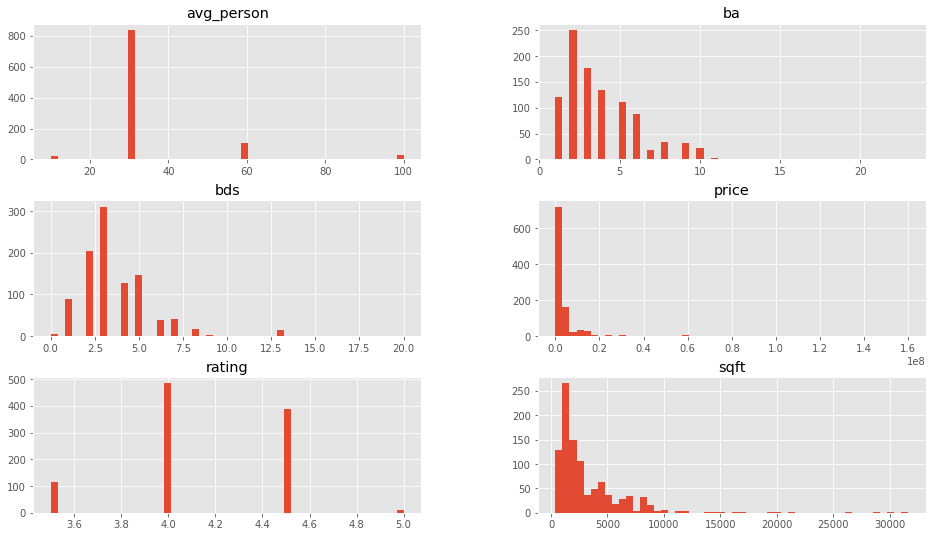

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
data.hist(bins=50,figsize=(16,9))

In [9]:
#It can be seen from the figure above that the unit of measurement for each attribute is different, so feature normalization will be done later.

In [10]:
#sqft	bds	ba	rating	avg_person	
x = data[['sqft', 'bds', 'ba', 'rating', 'avg_person']]
y = data[['price']]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression, k=5)
bestFeature = SelectKBest.fit_transform(x,y)
SelectKBest.get_support()
#x.columns[SelectKBest.get_support()]

C:\Users\12133\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True,  True,  True,  True,  True])

In [11]:
x.columns[SelectKBest.get_support()]
#From here, we can easily see that the two factors that have the greatest impact on house prices are the room size and the number of bedrooms.

Index(['sqft', 'bds', 'ba', 'rating', 'avg_person'], dtype='object')

In [12]:
#Standardize the data and view the scatter plot after standardization

In [13]:
features = data[['sqft', 'bds', 'ba', 'rating', 'avg_person','price']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in features.columns:
    features['normal'+feature] = scaler.fit_transform(features[[feature]])
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B3CEBC288>,
      dtype=object)

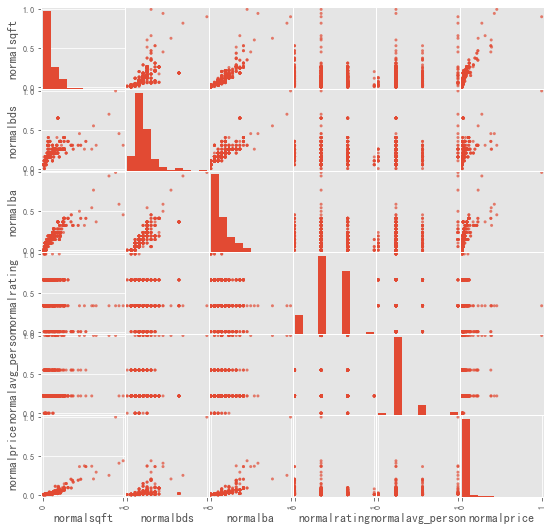

In [14]:
font={
      'family':'SimHei'
      }
matplotlib.rc('font', **font)
pd.plotting.scatter_matrix(features[['normalsqft', 'normalbds', 'normalba','normalrating','normalavg_person','normalprice']], alpha=0.7, figsize=(9,9), diagonal='hist')

In [15]:
#Split the data set into training data and test data train-%70 test-%30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features[['normalsqft', 'normalbds', 'normalba','normalrating','normalavg_person']], features['normalprice'], test_size=0.3,random_state=0)

In [16]:
#-->Part1-->  create Linear regression model and calculate the score
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
lp = linear_model.LinearRegression()
lp_predict = cross_val_predict(lp,x_train, y_train, cv=5)
lp_score = cross_val_score(lp, x_train, y_train, cv=5)
lp_meanscore = lp_score.mean()
print(lp_meanscore)

0.5771277818580572


In [17]:
#-->Part2--> Linear regression model predicts housing prices
lp.fit(x_train, y_train)
client_data=[[10551,3.0,2.0,4.5,30],[31005,6.0,3.0,5.0,100],[10800,3.0,3.0,4.5,60]]
lp_y_predict = lp.predict(client_data)
for i,price in enumerate(lp_y_predict):        
    print(i,"%d" %price)
    

0 6273
1 18436
2 6422


In [18]:
#From the scores obtained and the three predicted housing prices obtained from the input examples, it can be seen that using multiple linear regression models to analyze and predict housing prices is not accurate enough.

In [19]:
#-->part3 Upload to the local database and create the required table 

In [20]:
import csv
import mysql.connector


lists = []
with open('data/price_salary.csv','r',encoding='utf-8')as f:
    content = csv.reader(f)
    for con in content:
        if 'address_x' not in con:
            lists.append([con[3],con[8],con[9],con[10],con[4]])

conn = mysql.connector.connect(host = 'localhost',user = 'dsci551',database='world',password = 'dsci551')
cur = conn.cursor()
for i in lists:
    cur.execute('insert into salary(zipcode,title,address,salary,price) values("%s","%s","%s","%s","%s")'%(i[0],i[1],i[2],i[3],i[4]))
    conn.commit()
conn.close()

In [21]:
#--> i use MYSQL Workbench to create the new table and insert the part of data (price_salary.csv ) into the new table salary .
#--> and i also export the new table into salary.json (you can find it in /data)